In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import numpy as np
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt

(This problem is another aspect of Page_26 one). As I said in the Page_26 notebook, the number of photons which can be detected follows a Poisson distribution. Now, we want to test bayesian analysis to see if it works properly!!

For this purpose, first I generate random numbers from a poisson distribution. Then I feed this numbers to the codes gradually. Surprisingly, as I can increase the data, the program's  output gets close to the real value of lambda (which is 4).

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [s]


Sampling 2 chains for 1_000 tune and 15_000 draw iterations (2_000 + 30_000 draws total) took 22 seconds.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [s]


Sampling 2 chains for 1_000 tune and 15_000 draw iterations (2_000 + 30_000 draws total) took 30 seconds.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [s]


Sampling 2 chains for 1_000 tune and 15_000 draw iterations (2_000 + 30_000 draws total) took 99 seconds.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [s]


Sampling 2 chains for 1_000 tune and 15_000 draw iterations (2_000 + 30_000 draws total) took 213 seconds.
The number of effective samples is smaller than 25% for some parameters.


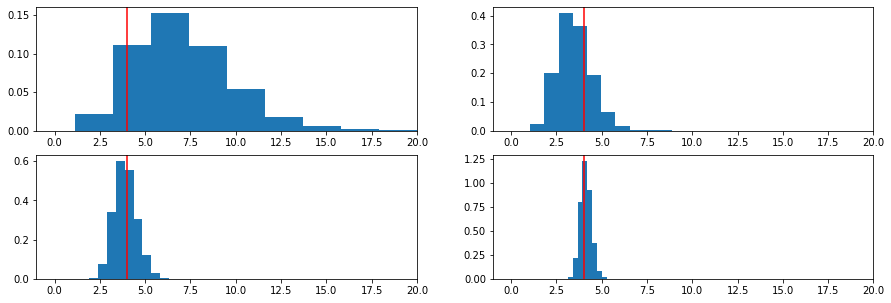

In [17]:
plt.figure(figsize=(15,5))

a = np.random.poisson(lam = 4 , size = (1,40))
d = a.ravel()
n = [1,4,10,40]
t = 1
v = 0
for i in n:
    data = d[:i]
    with pm.Model():
        s = pm.Uniform('s',0,10**7) # s = prior
        likelihood = pm.Poisson('likelihood',mu = s,observed=data)
        trace = pm.sample(15000, target_accept = 0.99)
        plt.subplot(2,2,t)
        plt.xlim(-1,20)
        plt.axvline(4,0,1,color='r')
        plt.hist(trace['s'], density = 1)
        t = t + 1
plt.show()

As you can see, with increasing data, bayesian estimation approaches the true value